In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/sarahflanigen/research/ObstacleSegmentation/euclideandistancebetweeneverycombination_andclosestptdist.csv')
npdf = df[['x','y','z']].to_numpy()

In [28]:
clustering = DBSCAN(eps=.2, min_samples=2).fit(npdf)


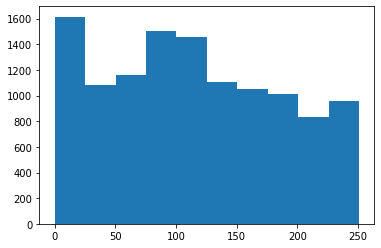

In [29]:

plt.hist(clustering.labels_)
df['clusterfromdbscan'] = clustering.labels_
dfsample = df[df.clusterfromdbscan < 3]

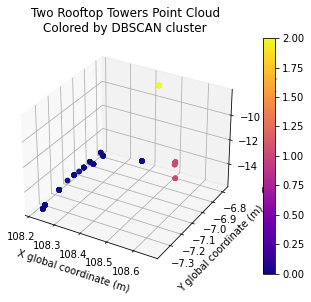

In [30]:
%matplotlib inline
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(dfsample.x,dfsample.y,dfsample.z,c = dfsample.clusterfromdbscan,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by DBSCAN cluster")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

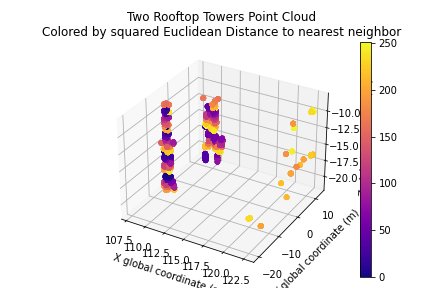

In [31]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(df.x,df.y,df.z,c = clustering.labels_,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by squared Euclidean Distance to nearest neighbor")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)